In [28]:
# ───────────────────────────────────────────────────────────────────────────────
# 📦 Standard Library Imports
# ───────────────────────────────────────────────────────────────────────────────
import os
import sys
import time
import csv
import json
from pathlib import Path

# ───────────────────────────────────────────────────────────────────────────────
# 📚 Scientific & Data Libraries
# ───────────────────────────────────────────────────────────────────────────────
import numpy as np
import matplotlib.pyplot as plt

# ───────────────────────────────────────────────────────────────────────────────
# 🌍 Third-Party Library Imports (PyTorch)
# ───────────────────────────────────────────────────────────────────────────────
import torch
import torch.optim as optim
import torchvision.transforms.functional as TF

# ───────────────────────────────────────────────────────────────────────────────
# 🧩 Custom Project Modules
# ───────────────────────────────────────────────────────────────────────────────
sys.path.append('C:/Users/nnobi/Desktop/FIUBA/Tesis/Project')

from project_package.utils import train_common_routines as tcr
from project_package.conv_net.ConvNet_model import SRCNN
from project_package.dataset_manager.webdataset_dataset import PtWebDataset

In [45]:
import tarfile
import torch
import matplotlib.pyplot as plt

def plot_pt_images_from_tar(tar_path, num_images=None, samples_per_row=4):
    with tarfile.open(tar_path, 'r') as tar:
        # Buscamos archivos .pt
        pt_members = [m for m in tar.getmembers() if m.name.endswith('.pt')]
        
        print(f"Se encontraron {len(pt_members)} archivos .pt en el tar")
        
        if num_images is None or num_images > len(pt_members):
            num_images = len(pt_members)
        
        if num_images == 0:
            print("No se encontraron imágenes para mostrar")
            return
        
        rows = (num_images + samples_per_row - 1) // samples_per_row
        
        fig, axs = plt.subplots(rows, samples_per_row, figsize=(samples_per_row * 3, rows * 3))
        axs = axs.flatten() if num_images > 1 else [axs]
        
        for i in range(num_images):
            fileobj = tar.extractfile(pt_members[i])
            tensor = torch.load(fileobj)
            # Asumimos tensor en formato CHW y rango [0,1] o [0,255]
            
            if tensor.ndim == 3:  # C,H,W
                img = tensor.permute(1, 2, 0).cpu().numpy()
            elif tensor.ndim == 2:  # H,W (grayscale)
                img = tensor.cpu().numpy()
            else:
                raise ValueError(f"Tensor con formato inesperado: {tensor.shape}")
            
            # Si la imagen tiene valores > 1, normalizamos a [0,1]
            if img.max() > 1:
                img = img / 255
            
            axs[i].imshow(img)
            axs[i].axis('off')
            axs[i].set_title(pt_members[i].name)
        
        for j in range(num_images, len(axs)):
            axs[j].axis('off')
        
        plt.tight_layout()
        plt.show()

Se encontraron 234 archivos .pt en el tar


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00029177588..0.0041928124].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00028560567..0.0043570376].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00024706448..0.004057135].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00010029372..0.004039298].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.00021250726..0.0040484644].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.05857981..0.9876663].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] f

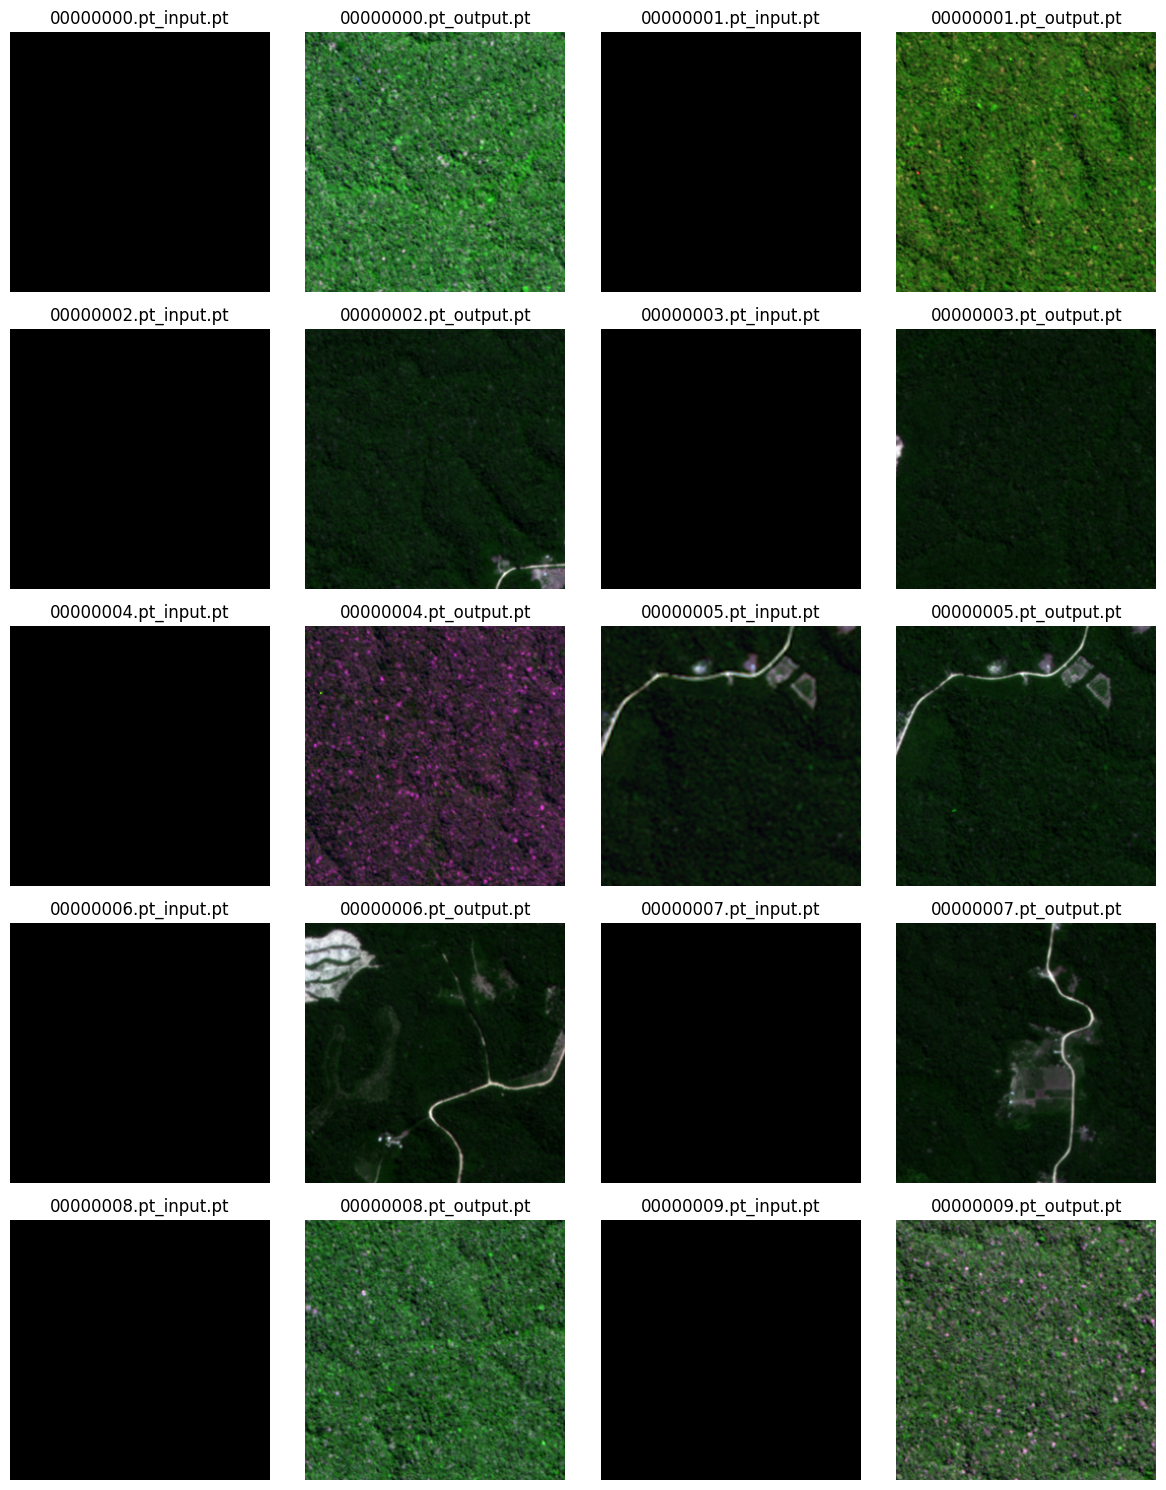

In [49]:
script_dir = script_dir = os.getcwd()
project_dir = os.path.abspath(os.path.join(script_dir, '..'))

dataset = 'messi' # Select Dataset
dataset_folder = os.path.join(project_dir, 'datasets', dataset)
tar_path = os.path.join(dataset_folder,'train.tar')

metadata_path = os.path.join(dataset_folder, 'metadata.json')
with open(metadata_path, "r") as f:
    metadata = json.load(f)

train_samples = metadata["splits"]["train"]["num_samples"]
val_samples = metadata["splits"]["val"]["num_samples"]
test_samples = metadata["splits"]["test"]["num_samples"]


plot_pt_images_from_tar(tar_path, num_images=20, samples_per_row=4)